# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 25.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
318593,0.0366,0.0024,0.0098,0.2441,0.0171,0.0024,0.1001,0.1196,0.0171,0.1001,9,9,8,8
440936,0.1904,0.1147,0.0024,0.0049,0.0049,0.1807,0.6714,0.0439,0.0171,0.0879,5,0,21,0
310850,0.0537,0.0049,0.0049,0.0024,0.0024,0.0317,0.1855,0.2466,0.0049,0.0293,10,0,7,0
138150,0.0171,0.0024,0.0024,0.0024,0.0049,0.0049,0.0024,0.0171,0.0049,0.0024,0,0,0,0
456091,0.2954,0.1074,0.0537,0.0269,0.0513,0.1001,0.3589,0.9692,0.0317,0.1147,7,7,22,22


In [3]:
raw_data.shape

(469821, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469821 entries, 0 to 469820
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          469821 non-null  float64
 1   Emg2          469821 non-null  float64
 2   Emg3          469821 non-null  float64
 3   Emg4          469821 non-null  float64
 4   Emg5          469821 non-null  float64
 5   Emg6          469821 non-null  float64
 6   Emg7          469821 non-null  float64
 7   Emg8          469821 non-null  float64
 8   Emg9          469821 non-null  float64
 9   Emg10         469821 non-null  float64
 10  repetition    469821 non-null  int64  
 11  rerepetition  469821 non-null  int64  
 12  stimulus      469821 non-null  int64  
 13  restimulus    469821 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.2 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000
mean,0.268114,0.156607,0.128820,0.109278,0.020653,0.037569,0.349515,0.402672,0.131860,0.270130,3.156387,2.382701,5.594729,4.278744
std,0.324583,0.297356,0.288758,0.312210,0.053065,0.090803,0.522189,0.513143,0.335658,0.439442,3.483117,3.324333,6.577557,6.291936
min,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.061000,0.002400,0.004900,0.002400,0.004900,0.002400,0.078100,0.102500,0.002400,0.012200,0.000000,0.000000,0.000000,0.000000
50%,0.153800,0.019500,0.004900,0.004900,0.004900,0.007300,0.178200,0.251500,0.004900,0.100100,2.000000,0.000000,3.000000,0.000000
75%,0.361300,0.168500,0.144000,0.048800,0.007300,0.036600,0.397900,0.488300,0.112300,0.356400,6.000000,5.000000,10.000000,8.000000
max,4.643600,4.147900,4.638700,4.643600,1.992200,2.661100,4.641100,4.646000,4.638700,4.638700,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     200217
8      15593
7      15585
2      15581
4      15579
12     15577
9      15553
11     15552
6      15541
5      15533
3      15531
10     15525
1      15505
14     10403
17     10402
13     10386
15     10360
16     10325
18      5198
21      5198
19      5193
23      5163
20      5161
22      5160
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

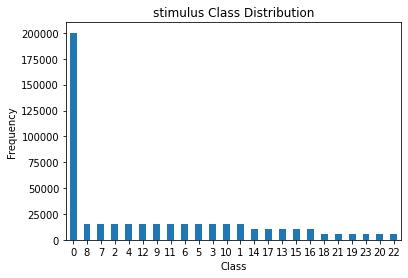

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
221287,1.3379,0.4810,0.3882,0.1050,0.1196,0.4297,1.5161,1.2354,0.5933,1.0498,2,2,15,15
203589,0.2612,0.4834,1.0327,2.5293,0.2466,0.0806,0.6689,0.3687,0.5664,0.5249,1,1,13,13
453887,0.0317,0.0024,0.0049,0.0024,0.0049,0.0122,0.1343,0.0317,0.0024,0.0098,0,0,0,0
234724,0.4199,0.1514,0.6470,1.7969,0.1050,0.0781,0.6421,0.2563,1.3184,0.7544,8,8,16,16
107610,0.0391,0.0024,0.0024,0.0049,0.0049,0.0024,0.0269,0.0195,0.0024,0.0049,0,0,0,0


In [12]:
raw_data.shape

(394034, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394034 entries, 0 to 469820
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          394034 non-null  float64
 1   Emg2          394034 non-null  float64
 2   Emg3          394034 non-null  float64
 3   Emg4          394034 non-null  float64
 4   Emg5          394034 non-null  float64
 5   Emg6          394034 non-null  float64
 6   Emg7          394034 non-null  float64
 7   Emg8          394034 non-null  float64
 8   Emg9          394034 non-null  float64
 9   Emg10         394034 non-null  float64
 10  repetition    394034 non-null  int64  
 11  rerepetition  394034 non-null  int64  
 12  stimulus      394034 non-null  int64  
 13  restimulus    394034 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 45.1 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 88.46549164414328


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     39171
           1       0.82      0.81      0.82      1948
           2       0.84      0.85      0.84      2393
           3       0.81      0.81      0.81      2279
           4       0.82      0.82      0.82      2303
           5       0.82      0.84      0.83      2129
           6       0.88      0.87      0.88      2103
           7       0.85      0.85      0.85      2131
           8       0.85      0.84      0.84      2256
           9       0.77      0.77      0.77      2332
          10       0.71      0.70      0.70      2518
          11       0.84      0.85      0.84      2252
          12       0.75      0.75      0.75      2438
          13       0.83      0.82      0.83      1487
          14       0.81      0.82      0.81      1393
          15       0.80      0.80      0.80      1511
          16       0.82      0.84      0.83      1565
 

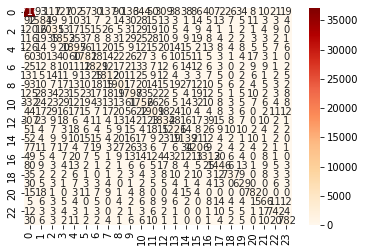

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.8540738766860811
MSE: 9.349562856091463
RMSE: 3.057705488776096


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8846748633589304
Recall Score :  0.8846549164414329
f1_score :  0.8846405169770538


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 94.12488738310049


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     39171
           1       0.94      0.92      0.93      1948
           2       0.93      0.92      0.93      2393
           3       0.92      0.89      0.91      2279
           4       0.94      0.91      0.93      2303
           5       0.92      0.90      0.91      2129
           6       0.96      0.95      0.96      2103
           7       0.94      0.90      0.92      2131
           8       0.94      0.91      0.93      2256
           9       0.91      0.88      0.89      2332
          10       0.88      0.79      0.83      2518
          11       0.95      0.92      0.93      2252
          12       0.90      0.83      0.86      2438
          13       0.93      0.92      0.93      1487
          14       0.95      0.90      0.93      1393
          15       0.92      0.89      0.90      1511
          16       0.95      0.92      0.93      1565
 

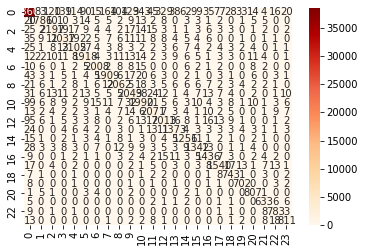

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.453804865050059
MSE: 5.061491999441674
RMSE: 2.2497759887245827


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9408262021241176
Recall Score :  0.9412488738310049
f1_score :  0.9406099390528251


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 95.82270610478764


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     39171
           1       0.97      0.93      0.95      1948
           2       0.98      0.92      0.95      2393
           3       0.97      0.91      0.94      2279
           4       0.97      0.93      0.95      2303
           5       0.97      0.95      0.96      2129
           6       0.99      0.96      0.97      2103
           7       0.96      0.92      0.94      2131
           8       0.98      0.94      0.96      2256
           9       0.95      0.91      0.93      2332
          10       0.93      0.82      0.87      2518
          11       0.97      0.95      0.96      2252
          12       0.94      0.85      0.90      2438
          13       0.97      0.95      0.96      1487
          14       0.97      0.94      0.96      1393
          15       0.95      0.93      0.94      1511
          16       0.98      0.95      0.97      1565
 

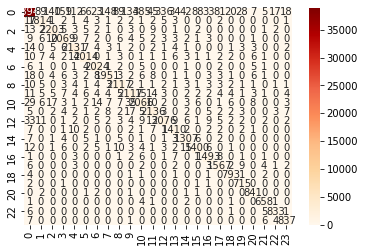

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.33607420660601217
MSE: 3.785539355640996
RMSE: 1.9456462565535895


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9585392592921482
Recall Score :  0.9582270610478765
f1_score :  0.957755648402301


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[12:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 90.83330161026305


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     39171
           1       0.90      0.84      0.87      1948
           2       0.90      0.85      0.88      2393
           3       0.87      0.81      0.84      2279
           4       0.88      0.83      0.86      2303
           5       0.88      0.85      0.86      2129
           6       0.94      0.90      0.92      2103
           7       0.91      0.85      0.88      2131
           8       0.91      0.85      0.88      2256
           9       0.80      0.76      0.78      2332
          10       0.76      0.69      0.72      2518
          11       0.88      0.86      0.87      2252
          12       0.83      0.73      0.78      2438
          13       0.89      0.85      0.87      1487
          14       0.90      0.85      0.87      1393
          15       0.83      0.81      0.82      1511
          16       0.89      0.86      0.88      1565
 

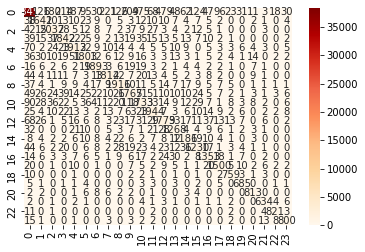

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.6438006776047813
MSE: 6.73463017244661
RMSE: 2.5951166009346496


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9067544807800247
Recall Score :  0.9083330161026305
f1_score :  0.9067799844304166


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 96.09044881799839


Classification report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     39171
           1       0.99      0.94      0.96      1948
           2       0.98      0.93      0.95      2393
           3       0.97      0.91      0.94      2279
           4       0.98      0.93      0.96      2303
           5       0.98      0.94      0.96      2129
           6       0.99      0.97      0.98      2103
           7       0.97      0.91      0.94      2131
           8       0.99      0.94      0.96      2256
           9       0.97      0.91      0.94      2332
          10       0.94      0.82      0.88      2518
          11       0.98      0.96      0.97      2252
          12       0.96      0.84      0.90      2438
          13       0.98      0.96      0.97      1487
          14       0.98      0.94      0.96      1393
          15       0.97      0.91      0.94      1511
          16       0.99      0.96      0.98      1565
 

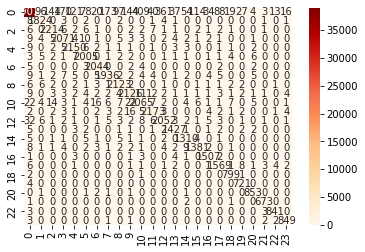

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.3273567068915198
MSE: 3.701397084015379
RMSE: 1.9239015265900121


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9615957074306627
Recall Score :  0.960904488179984
f1_score :  0.960435249126641
